In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from fastmri.pl_modules import UnetModule

# Functie om de gewichten van twee modellen te vergelijken
def compare_weights(model1, model2):
    for name, param1 in model1.named_parameters():
        param2 = model2.get_parameter(name)
        if param1.shape != param2.shape:
            print(f"Shape mismatch for {name}")
            continue
        # Bereken het percentage van gewijzigde parameters
        changed_percentage = np.mean(param1.data.cpu().numpy() != param2.data.cpu().numpy()) * 100
        print(f"Laag {name}: {changed_percentage:.2f}% van de parameters zijn gewijzigd.")
        
        # Visualisatie van de gewijzigde parameters
        plt.figure()
        plt.hist(np.ndarray.flatten(param1.data.cpu().numpy() - param2.data.cpu().numpy()), bins=50)
        plt.title(f"Veranderingen in gewichten van laag {name}")
        plt.show()


Laag unet.down_sample_layers.0.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


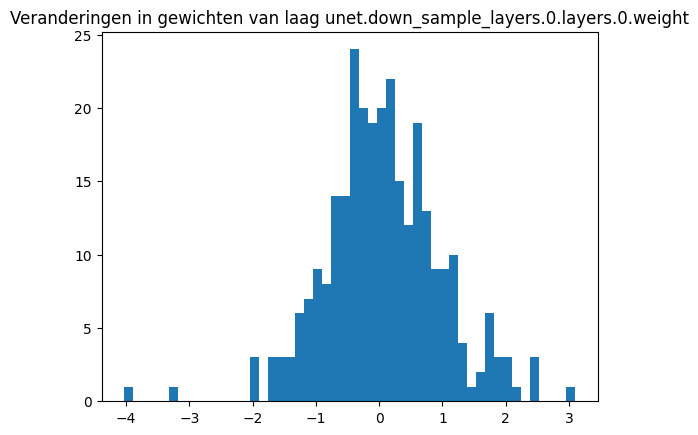

Laag unet.down_sample_layers.0.layers.4.weight: 100.00% van de parameters zijn gewijzigd.


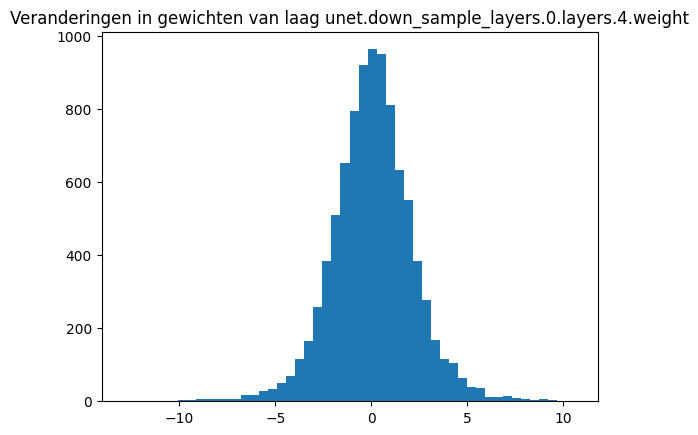

Laag unet.down_sample_layers.1.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


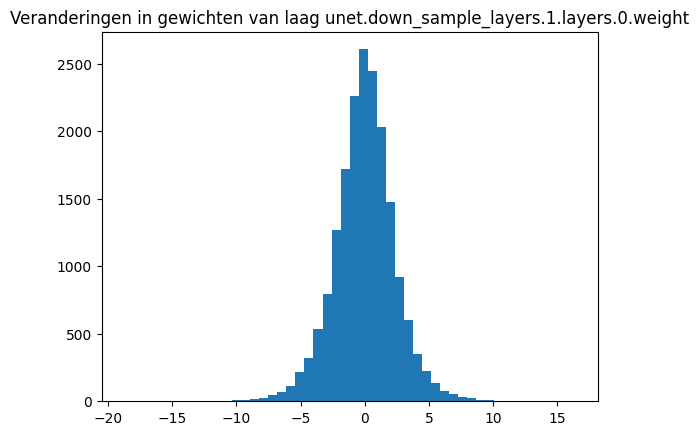

Laag unet.down_sample_layers.1.layers.4.weight: 100.00% van de parameters zijn gewijzigd.


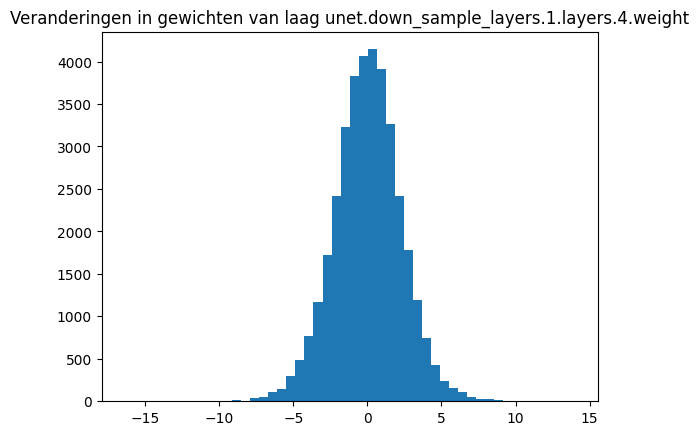

Laag unet.down_sample_layers.2.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


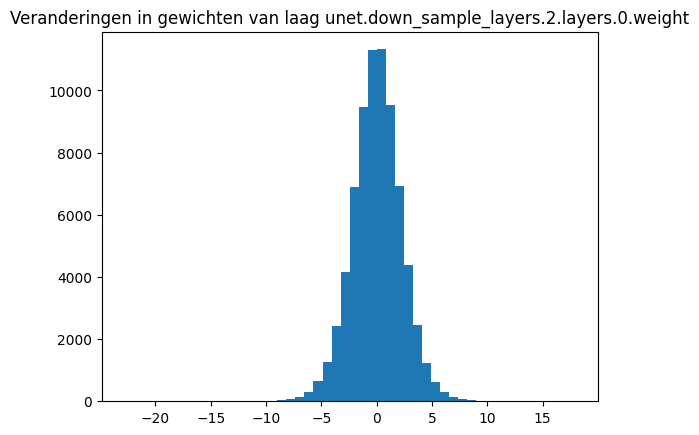

Laag unet.down_sample_layers.2.layers.4.weight: 100.00% van de parameters zijn gewijzigd.


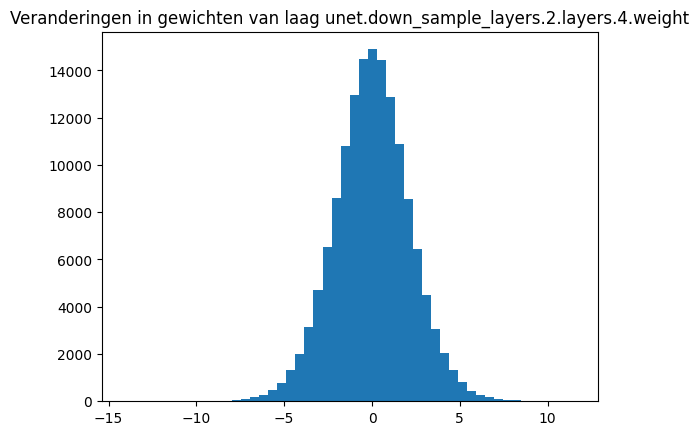

Laag unet.down_sample_layers.3.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


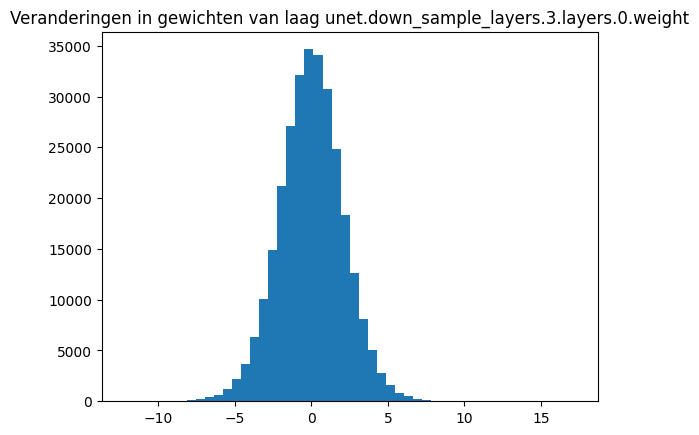

Laag unet.down_sample_layers.3.layers.4.weight: 100.00% van de parameters zijn gewijzigd.


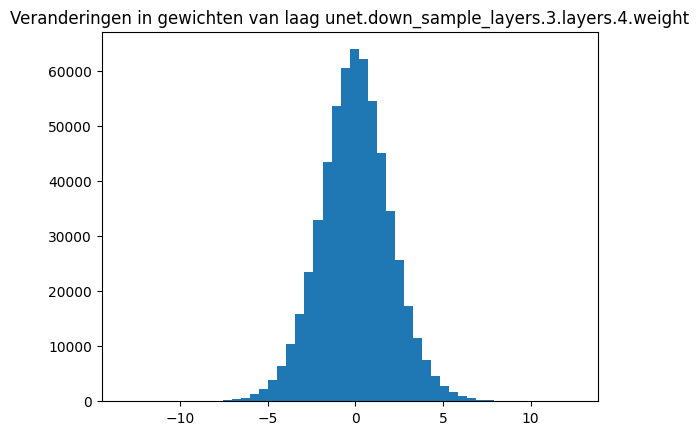

Laag unet.conv.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


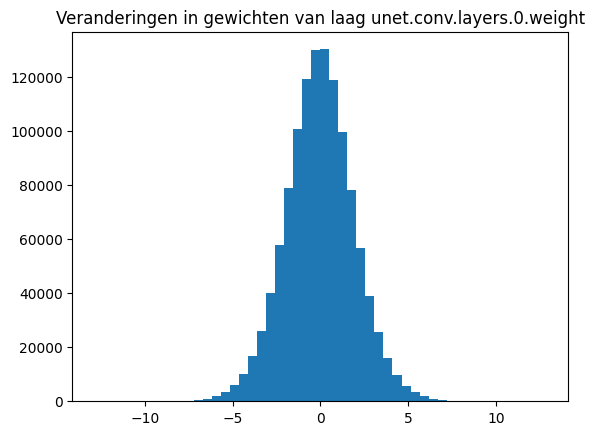

Laag unet.conv.layers.4.weight: 100.00% van de parameters zijn gewijzigd.


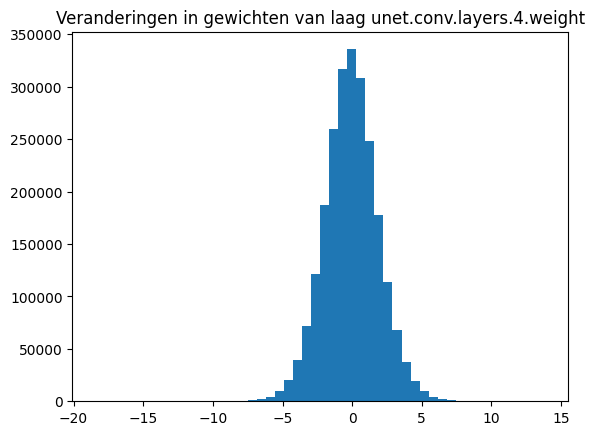

Laag unet.up_conv.0.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


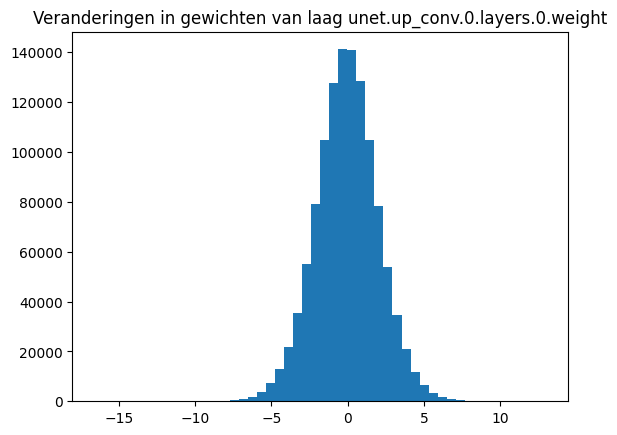

Laag unet.up_conv.0.layers.4.weight: 100.00% van de parameters zijn gewijzigd.


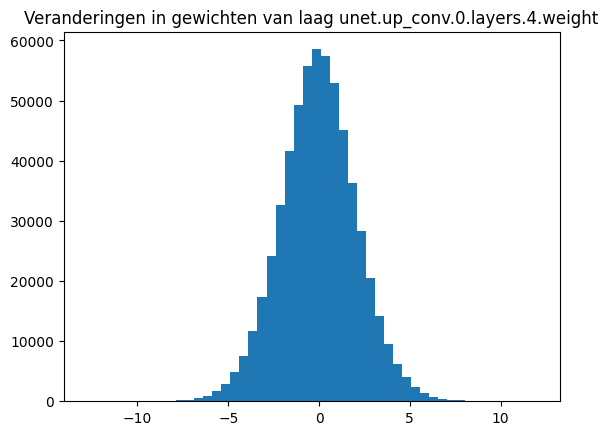

Laag unet.up_conv.1.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


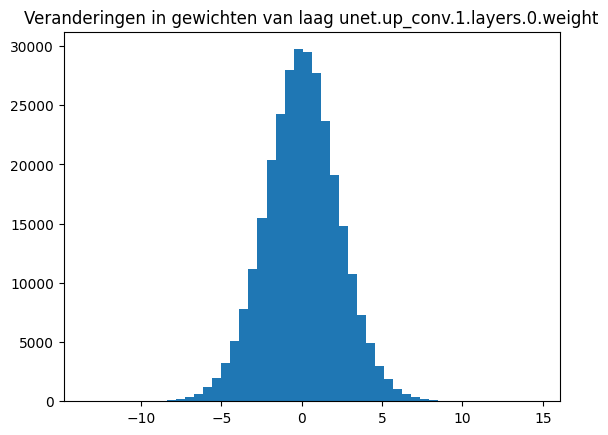

Laag unet.up_conv.1.layers.4.weight: 100.00% van de parameters zijn gewijzigd.


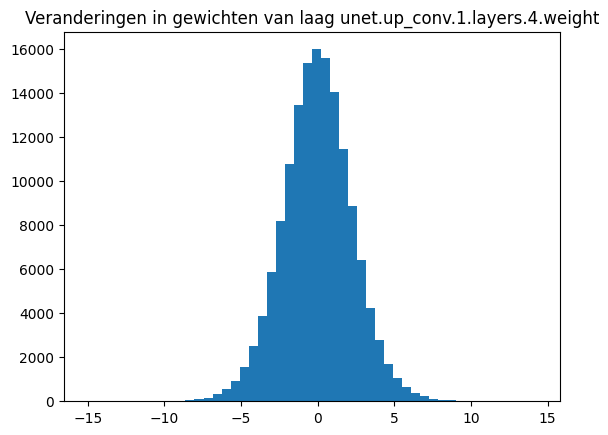

Laag unet.up_conv.2.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


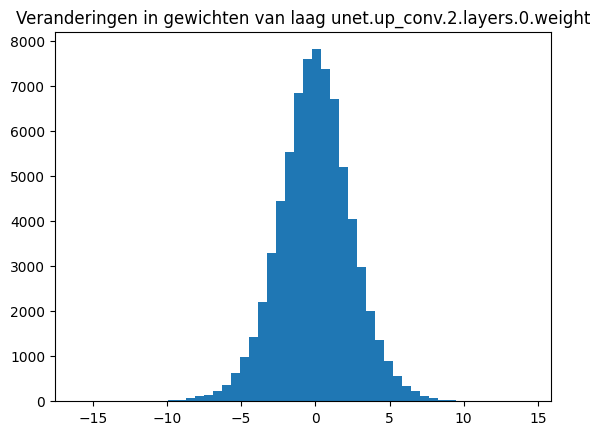

Laag unet.up_conv.2.layers.4.weight: 100.00% van de parameters zijn gewijzigd.


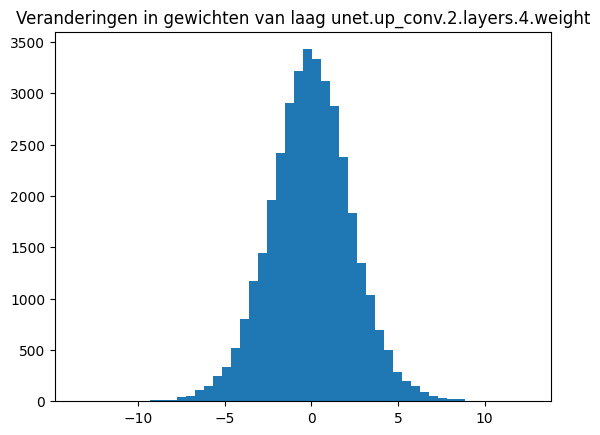

Laag unet.up_conv.3.0.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


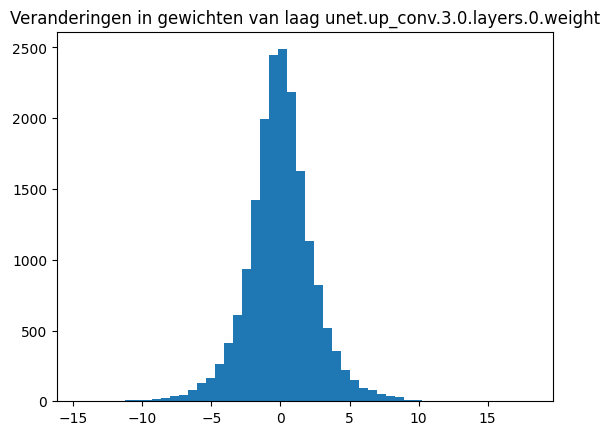

Laag unet.up_conv.3.0.layers.4.weight: 100.00% van de parameters zijn gewijzigd.


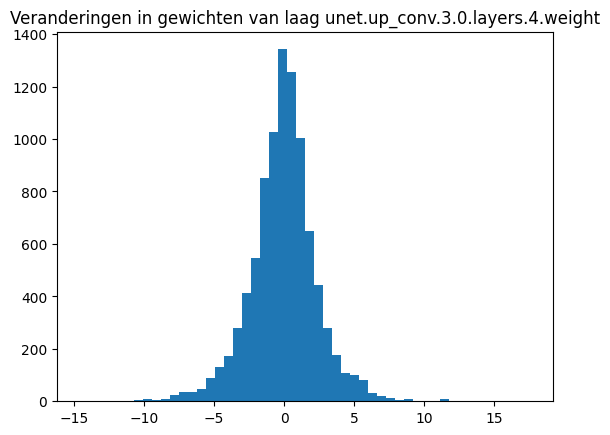

Laag unet.up_conv.3.1.weight: 100.00% van de parameters zijn gewijzigd.


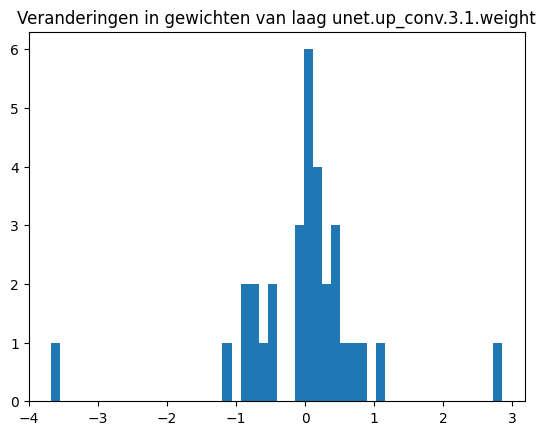

Laag unet.up_conv.3.1.bias: 100.00% van de parameters zijn gewijzigd.


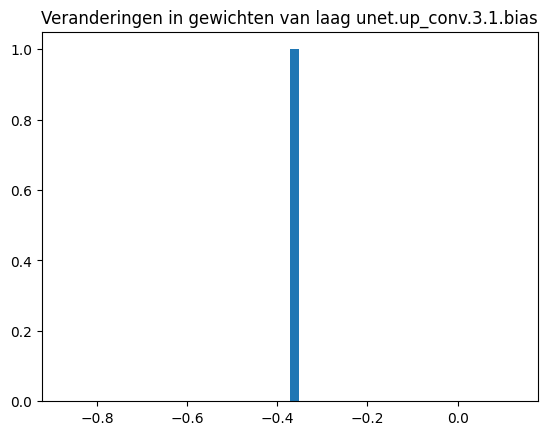

Laag unet.up_transpose_conv.0.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


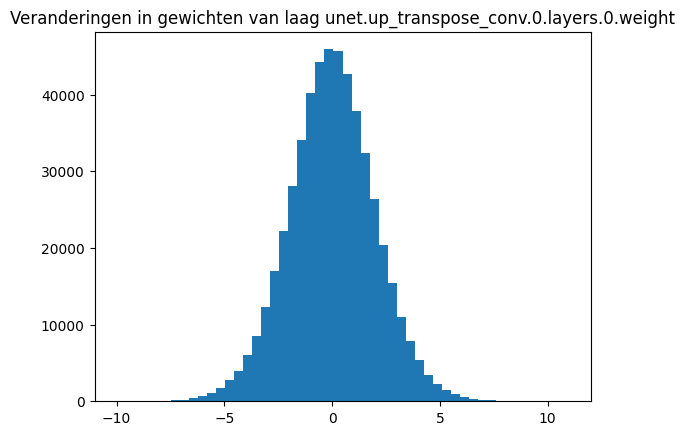

Laag unet.up_transpose_conv.1.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


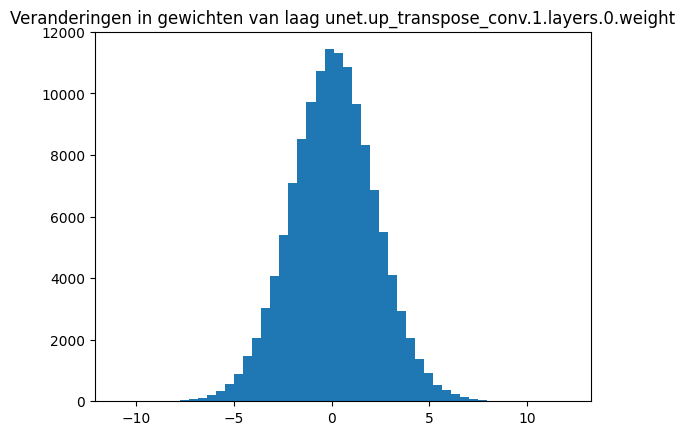

Laag unet.up_transpose_conv.2.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


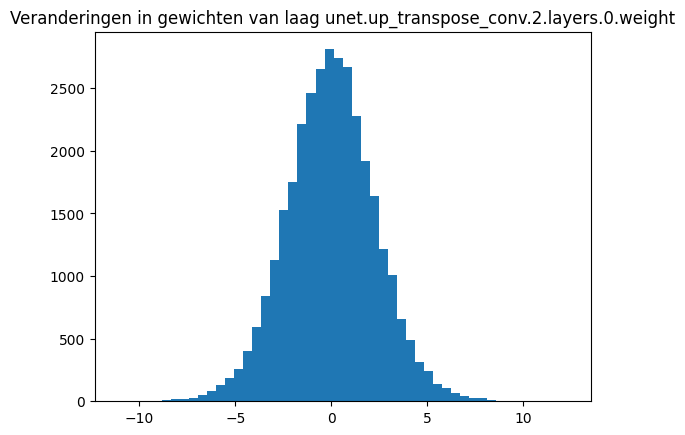

Laag unet.up_transpose_conv.3.layers.0.weight: 100.00% van de parameters zijn gewijzigd.


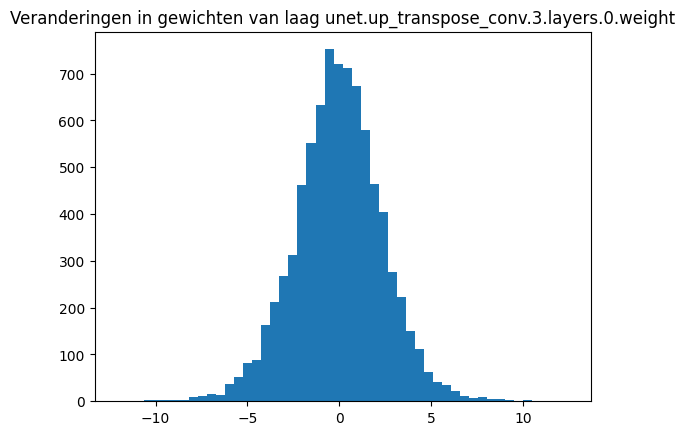

In [8]:
# Paths
pad_1 = '/usr/local/micapollo01/MIC/DATA/STUDENTS/mvhave7/Results/GitLab/master_thesis/BaselineUNet/Checkpoints/epoch=48-step=3466651.ckpt'  # R = 4
pad_2 = '/usr/local/micapollo01/MIC/DATA/STUDENTS/mvhave7/Results/GitLab/master_thesis/BaselineUNet/Checkpoints_combined_R/epoch=49-step=3537399.ckpt'  # R = 4+8

# Laden van de modellen
model_R4 = UnetModule.load_from_checkpoint(
    checkpoint_path=pad_1,
    in_chans=1,
    out_chans=1,
    chans=32,
    num_pool_layers=4,
    drop_prob=0.0,
    lr=0.001,
    lr_step_size=40,
    lr_gamma=0.1,
    weight_decay=0.0,
)

model_R4_plus_8 = UnetModule.load_from_checkpoint(
    checkpoint_path=pad_2,
    in_chans=1,
    out_chans=1,
    chans=32,
    num_pool_layers=4,
    drop_prob=0.0,
    lr=0.001,
    lr_step_size=40,
    lr_gamma=0.1,
    weight_decay=0.0,
)

# Uitvoeren van de vergelijkingsfunctie
compare_weights(model_R4, model_R4_plus_8)
